In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [7]:
df['median_house_value']

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
16995,111400.0
16996,79000.0
16997,103600.0
16998,85800.0


In [8]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    n_jobs=-1,
    random_state=42
)

In [20]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [21]:
y_pred = xg_reg.predict(X_test)

In [22]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [23]:
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 46507.4666
R2 Score: 0.8430


In [34]:
xg_reg_early = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=5000,
    learning_rate=0.01,
    max_depth=5,
    n_jobs=-1,
    random_state=42,
    early_stopping_rounds=10,
    verbose=True,
)

In [36]:
xg_reg_early.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-rmse:116714.40933
[1]	validation_0-rmse:116019.35828
[2]	validation_0-rmse:115332.54529
[3]	validation_0-rmse:114658.06381
[4]	validation_0-rmse:113983.12395
[5]	validation_0-rmse:113328.19675
[6]	validation_0-rmse:112672.34890
[7]	validation_0-rmse:112027.94231
[8]	validation_0-rmse:111398.78728
[9]	validation_0-rmse:110777.40369
[10]	validation_0-rmse:110155.70251
[11]	validation_0-rmse:109553.56935
[12]	validation_0-rmse:108961.81919
[13]	validation_0-rmse:108366.79359
[14]	validation_0-rmse:107787.83574
[15]	validation_0-rmse:107209.17599
[16]	validation_0-rmse:106648.08599
[17]	validation_0-rmse:106085.81788
[18]	validation_0-rmse:105533.44314
[19]	validation_0-rmse:104984.34563
[20]	validation_0-rmse:104444.57444
[21]	validation_0-rmse:103913.74176
[22]	validation_0-rmse:103388.48980


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:23:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[23]	validation_0-rmse:102872.29037
[24]	validation_0-rmse:102363.39847
[25]	validation_0-rmse:101861.69111
[26]	validation_0-rmse:101365.30092
[27]	validation_0-rmse:100882.26943
[28]	validation_0-rmse:100400.23603
[29]	validation_0-rmse:99928.08240
[30]	validation_0-rmse:99466.91895
[31]	validation_0-rmse:99008.71747
[32]	validation_0-rmse:98524.02796
[33]	validation_0-rmse:98079.88545
[34]	validation_0-rmse:97606.20232
[35]	validation_0-rmse:97166.36210
[36]	validation_0-rmse:96710.90090
[37]	validation_0-rmse:96296.32420
[38]	validation_0-rmse:95850.24183
[39]	validation_0-rmse:95436.51887
[40]	validation_0-rmse:94999.46424
[41]	validation_0-rmse:94605.24988
[42]	validation_0-rmse:94183.98102
[43]	validation_0-rmse:93791.20974
[44]	validation_0-rmse:93375.98938
[45]	validation_0-rmse:92995.70026
[46]	validation_0-rmse:92593.90887
[47]	validation_0-rmse:92224.15218
[48]	validation_0-rmse:91862.02751
[49]	validation_0-rmse:91475.40541
[50]	validation_0-rmse:91120.44755
[51]	validatio

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5000,
             n_jobs=-1, num_parallel_tree=None, ...)

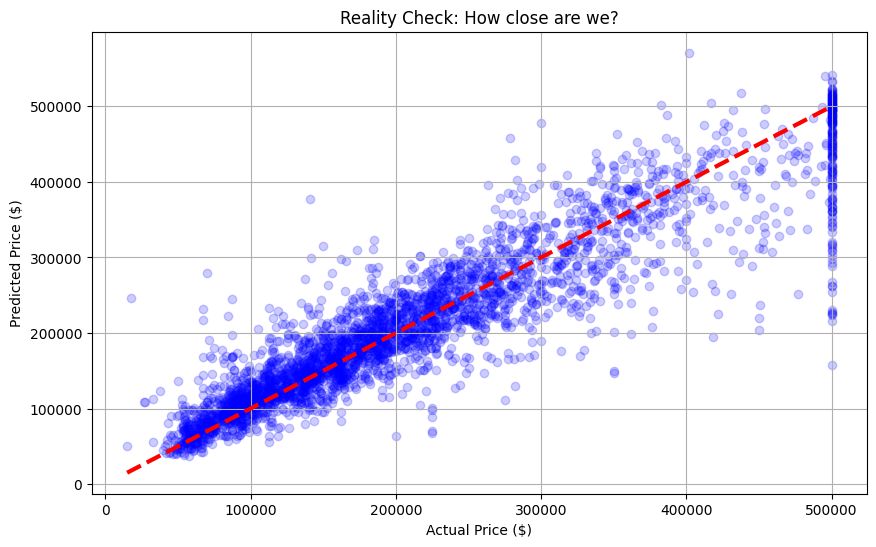

In [37]:
import matplotlib.pyplot as plt

# 1. Make predictions
predictions = xg_reg_early.predict(X_test)

# 2. Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.2, color='blue') # alpha=0.2 makes it see-through

# 3. Draw the "Perfect Prediction" line (Red)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)

plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Reality Check: How close are we?')
plt.grid(True)
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

# 1. Define the "Menu" of options to try
param_grid = {
    'max_depth': [3, 5, 7],           # Shallow vs Deep
    'learning_rate': [0.01, 0.05, 0.1], # Slow vs Fast
    'n_estimators': [1000, 2000],     # Number of trees
    'subsample': [0.7, 1.0]           # Train on 70% of data vs 100% (Prevents overfitting)
}

# 2. Setup the Grid Search
xgb_grid = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=xgb_grid,
    param_grid=param_grid,
    cv=3,             # Cross-validation (3-fold)
    scoring='neg_root_mean_squared_error',
    verbose=1
)

# 3. RUN (This will take a few minutes!)
print("Searching for the perfect hyperparameters...")
grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_}")

Searching for the perfect hyperparameters...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.7}
Best RMSE: 46598.574572343525
